In [76]:
"""
Diabetes Detection using MLP (ReLU only)
--------------------------------------
Steps:
1. Load & clean dataset
2. Encode categorical features
3. Scale features
4. Train / Validation / Test split
5. Train ReLU MLP models (1–5 hidden layers)
6. Evaluate metrics, confusion matrix, ROC, and plots
"""

# ==============================
# 1. Imports
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from tensorflow.keras.regularizers import l2
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import KFold


# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [77]:
# ==============================
# 2. Load Dataset
# ==============================
df = pd.read_csv(
    "DiaBD_A Diabetes Dataset for Enhanced Risk Analysis and Research in Bangladesh.csv"
)

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Detect target column
target_col = [c for c in df.columns if 'diabetic' in c][0]

print("Target column:", target_col)


Target column: diabetic


In [78]:
# ==============================
# 3. Missing Value Handling
# ==============================
if df.isnull().sum().sum() == 0:
    print("No missing values found.")
else:
    print("Handling missing values...")
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


No missing values found.


In [79]:
# ==============================
# 4. Encoding Categorical Data
# ==============================
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() == 2:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"Label Encoded: {col}")
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
        print(f"One-hot Encoded: {col}")


Label Encoded: gender
Label Encoded: diabetic


In [80]:
# ==============================
# 5. Split Features & Target
# ==============================
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
y.value_counts()

In [81]:
# ==============================
# K-Fold Cross Validation (Robustness Check)
# ==============================

fold = 1              # ✅ reset fold
mcc_scores = []

for train_idx, test_idx in kfold.split(X_scaled, y):
    print(f"\nFold {fold}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    smote = SMOTE(random_state=SEED)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    model = Sequential()
    model.add(Dense(64, activation='relu',
                    kernel_regularizer=l2(0.001),
                    input_shape=(X_train.shape[1],)))
    model.add(Dense(32, activation='relu',
                    kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_scores.append(mcc)

    print("MCC:", mcc)
    fold += 1

print("\nAverage MCC across 5 folds:", np.mean(mcc_scores))



Fold 1


c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MCC: 0.3582504752384794

Fold 2


c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MCC: 0.341262460745805

Fold 3


c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
MCC: 0.2506362807058406

Fold 4


c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MCC: 0.3379846101144489

Fold 5


c:\Users\acer\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MCC: 0.27305049588234614

Average MCC across 5 folds: 0.312236864537384


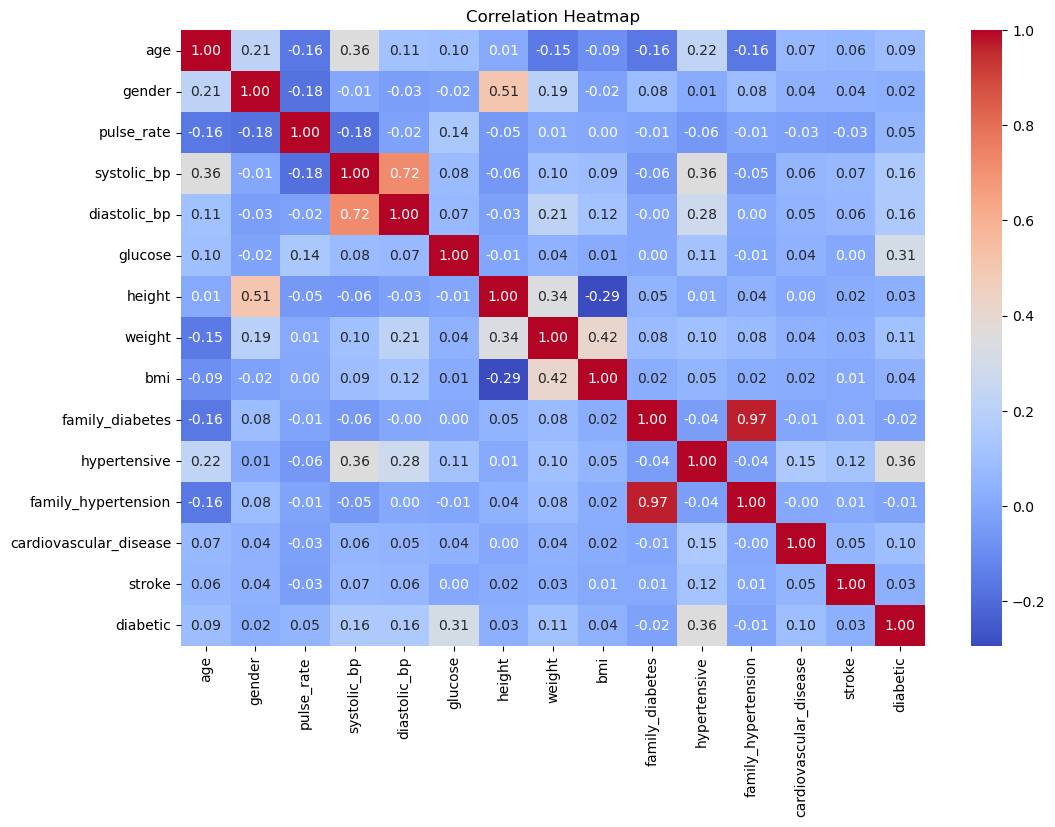

In [82]:
# ==============================
# 6. EDA (Kept same as your code)
# ==============================
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


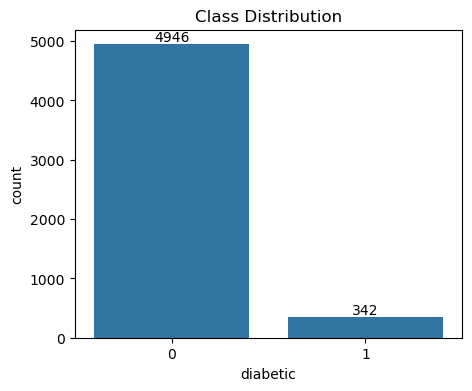

In [83]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=y)

plt.title("Class Distribution")

# Add values on top of bars
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',           # bar value
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.show()

In [84]:

# ==============================
# 7. Train / Validation / Test Split
# ==============================
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=SEED
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=SEED
)

# Convert to float32
X_train = np.asarray(X_train).astype(np.float32)
X_val   = np.asarray(X_val).astype(np.float32)
X_test  = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_val   = np.asarray(y_val).astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)

print("Shapes:", X_train.shape, X_val.shape, X_test.shape)

# ==============================
# 7A. Handle Data Skewness using SMOTE
# ==============================
print("\nBefore SMOTE class distribution:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=SEED)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train).value_counts())



Shapes: (3701, 14) (529, 14) (1058, 14)

Before SMOTE class distribution:
0.0    3461
1.0     240
Name: count, dtype: int64

After SMOTE class distribution:
0.0    3461
1.0    3461
Name: count, dtype: int64


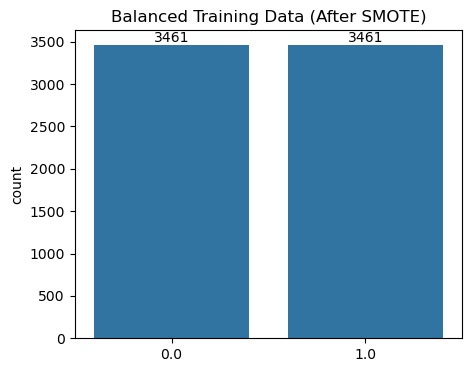

In [85]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x=y_train)
plt.title("Balanced Training Data (After SMOTE)")

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom'
    )

plt.show()


In [86]:
# ==============================
# 8. Build ReLU MLP Model
# ==============================

def build_relu_model(n_hidden):
    if n_hidden == 1:
        units = [64]
    elif n_hidden == 2:
        units = [64, 32]
    elif n_hidden == 3:
        units = [128, 64, 32]
    elif n_hidden == 4:
        units = [128, 64, 32, 16]
    else:
        units = [128, 64, 32, 16, 8]

    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))

    for u in units:
        model.add(Dense(
            u,
            activation='relu',
            kernel_regularizer=l2(0.001)
        ))
        model.add(Dropout(0.25))

    model.add(Dense(1, activation='sigmoid'))
    return model

In [87]:
# ==============================
# 9. Train & Evaluate ReLU Models
# ==============================
EPOCHS = 50
BATCH = 32

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True,
    verbose=0
)

results = []
histories = {}
roc_data = {}

for n in range(1, 6):
    name = f"{n}-hidden-relu"
    print(f"\nTraining {name}")

    tf.keras.backend.clear_session()

    model = build_relu_model(n)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS,
        batch_size=BATCH,
        callbacks=[early_stop],
        verbose=0
    )

    histories[name] = history
    best_val_acc = max(history.history['val_accuracy'])

    y_proba = model.predict(X_test).ravel()
    y_pred = (y_proba >= 0.5).astype(int)
    mcc = matthews_corrcoef(y_test, y_pred)


    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    results.append({
    "model": name,
    "n_hidden": n,
    "best_val_accuracy": best_val_acc,
    "test_accuracy": acc,
    "test_auc": auc,
    "precision": prec,
    "recall": rec,
    "f1": f1,
    "mcc": mcc,                      # ✅ ADDED
    "confusion_matrix": cm
})

   

    roc_data[name] = (fpr, tpr)



Training 1-hidden-relu
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training 2-hidden-relu
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Training 3-hidden-relu
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Training 4-hidden-relu
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Training 5-hidden-relu
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [88]:
# ==============================
# 10. Results Summary
# ==============================
res_df = pd.DataFrame(results).sort_values(by="test_auc", ascending=False)
res_df = res_df.sort_values(by="mcc", ascending=False)
print(res_df.drop(columns=["confusion_matrix"]).to_string(index=False))


        model  n_hidden  best_val_accuracy  test_accuracy  test_auc  precision   recall       f1      mcc
1-hidden-relu         1           0.875236       0.842155  0.828283   0.235294 0.647059 0.345098 0.323130
2-hidden-relu         2           0.843100       0.816635  0.828565   0.216216 0.705882 0.331034 0.319279
3-hidden-relu         3           0.837429       0.809074  0.838518   0.208696 0.705882 0.322148 0.310385
4-hidden-relu         4           0.850662       0.810964  0.836275   0.205357 0.676471 0.315068 0.298150
5-hidden-relu         5           0.822306       0.752363  0.827317   0.174497 0.764706 0.284153 0.281445


In [89]:
# Confusion Matrices
for _, row in res_df.iterrows():
    print(f"\nConfusion Matrix for {row['model']}:\n{row['confusion_matrix']}")



Confusion Matrix for 1-hidden-relu:
[[847 143]
 [ 24  44]]

Confusion Matrix for 2-hidden-relu:
[[816 174]
 [ 20  48]]

Confusion Matrix for 3-hidden-relu:
[[808 182]
 [ 20  48]]

Confusion Matrix for 4-hidden-relu:
[[812 178]
 [ 22  46]]

Confusion Matrix for 5-hidden-relu:
[[744 246]
 [ 16  52]]


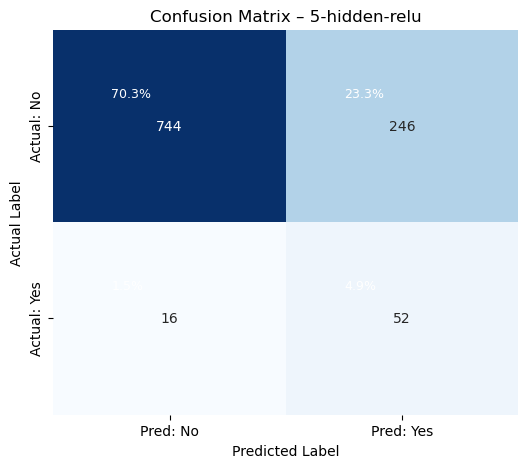

In [93]:
# -------------------------
# Confusion matrix plot (counts + %)
# -------------------------
confusion_matrices = []   # ✅ storage
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Append for later use
confusion_matrices.append({
    "model": name if 'name' in locals() else f"Fold-{fold}",
    "cm": cm
})


def plot_confusion_matrix_with_percent(cm, title):
    cm_counts = cm
    cm_percent = (cm_counts / cm_counts.sum()) * 100

    plt.figure(figsize=(6,5))
    ax = sns.heatmap(
        cm_counts,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        xticklabels=['Pred: No','Pred: Yes'],
        yticklabels=['Actual: No','Actual: Yes']
    )

    for i in range(cm_counts.shape[0]):
        for j in range(cm_counts.shape[1]):
            ax.text(
                j + 0.25,
                i + 0.35,
                f"{cm_percent[i,j]:.1f}%",
                color='white',
                fontsize=9
            )

    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

for item in confusion_matrices:
    plot_confusion_matrix_with_percent(
        item["cm"],
        f"Confusion Matrix – {item['model']}"
    )



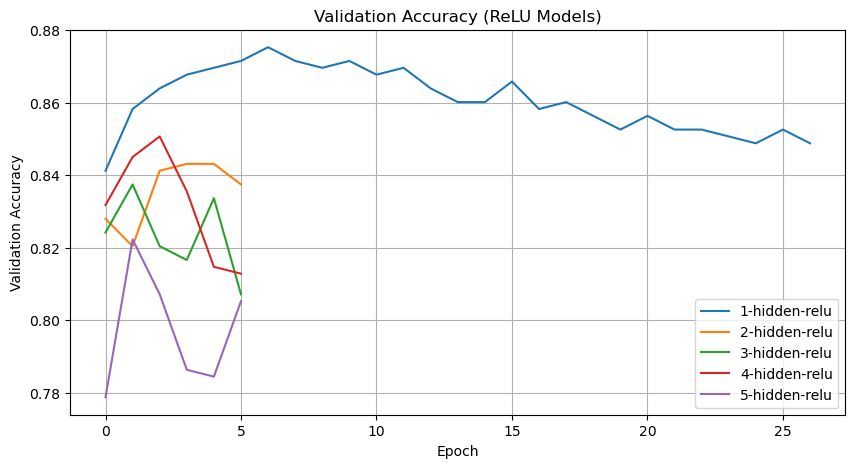

In [90]:
# ==============================
# 11. Plots
# ==============================
# Validation accuracy
plt.figure(figsize=(10,5))
for name, h in histories.items():
    plt.plot(h.history['val_accuracy'], label=name)
plt.title("Validation Accuracy (ReLU Models)")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


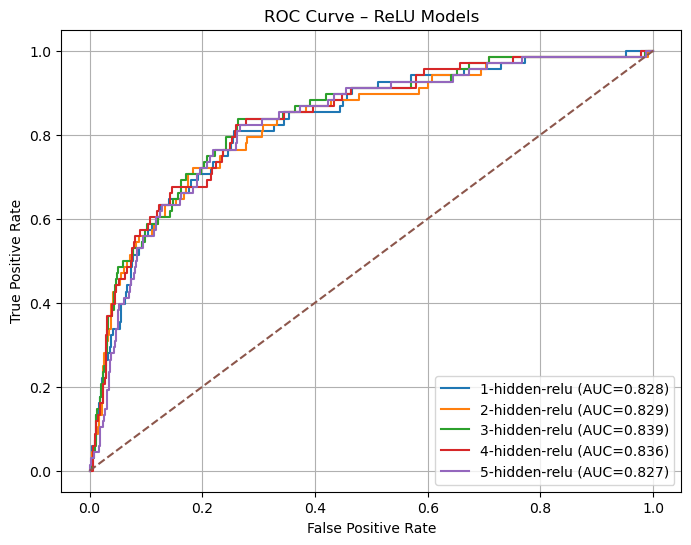

In [91]:

# ROC Curves
plt.figure(figsize=(8,6))
for name, (fpr, tpr) in roc_data.items():
    auc_val = res_df.loc[res_df['model'] == name, 'test_auc'].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_val:.3f})")

plt.plot([0,1], [0,1], '--')
plt.title("ROC Curve – ReLU Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()